In [17]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [18]:
hdul = fits.open('g28-37-ApogeeNet.fits')
hdul = hdul[1].data
t = Table(hdul)

In [19]:
plx  = t['plx']
plx_error = t['e_plx']

In [20]:
# ---- BASIC MASKS ----
finite = np.isfinite(plx)
use = finite

# Optional: require positive parallax
#use &= (plx > 0)

# Optional: apply S/N cut, e.g. ϖ/σϖ ≥ 5
if 'plx_err' in locals():
    good_err = np.isfinite(plx_err) & (plx_err > 0)
    use &= good_err & ((plx / plx_err) >= 5)

plx_use = plx[use]
print(f"Using {plx_use.size} sources")

Using 126 sources


In [21]:
# ---- CHOOSE BINS ----
# Freedman–Diaconis rule usually gives a nice automatic binning for skewed data
bins = np.histogram_bin_edges(plx_use, bins='fd')  # you can also use an int, e.g. bins=50


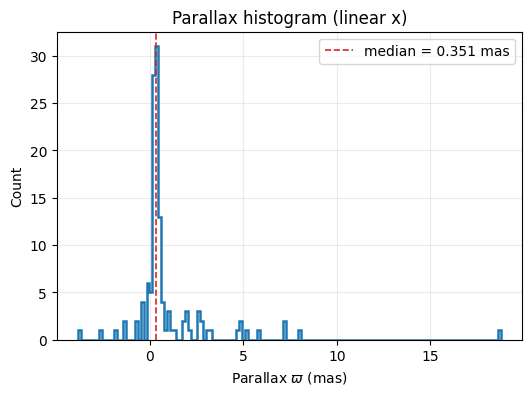

In [22]:
# ---- LINEAR-X HISTOGRAM (counts) ----
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(plx_use, bins=bins, histtype='step', linewidth=1.8)
ax.set_xlabel(r'Parallax $\varpi$ (mas)')
ax.set_ylabel('Count')
ax.set_title('Parallax histogram (linear x)')
ax.grid(alpha=0.25)

# Optional: show median
med = np.median(plx_use)
ax.axvline(med, color='tab:red', linestyle='--', linewidth=1.2, label=f'median = {med:.3f} mas')
ax.legend()

plt.show()

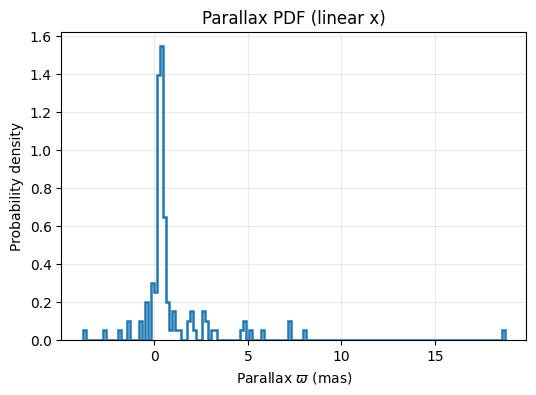

In [23]:
# ---- DENSITY-NORMALIZED VERSION (so area = 1) ----
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(plx_use, bins=bins, histtype='step', linewidth=1.8, density=True)
ax.set_xlabel(r'Parallax $\varpi$ (mas)')
ax.set_ylabel('Probability density')
ax.set_title('Parallax PDF (linear x)')
ax.grid(alpha=0.25)
plt.show()

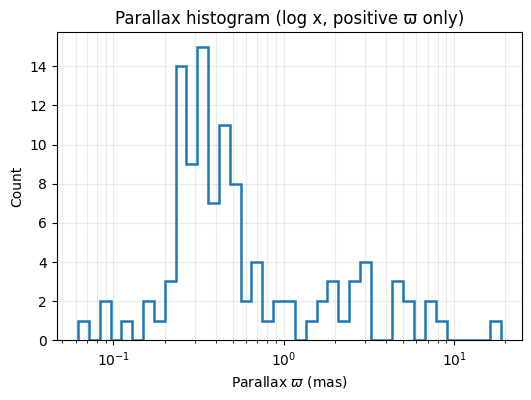

In [24]:
# ---- LOG-X VARIANT (only for strictly positive parallaxes) ----
pos = plx_use > 0
if np.count_nonzero(pos) > 0:
    p = plx_use[pos]
    # Log-spaced bins from min to max
    lo, hi = p.min(), p.max()
    # Guard against very tiny min
    lo = max(lo, 1e-4)  # 0.0001 mas floor to avoid log(0)
    log_bins = np.logspace(np.log10(lo), np.log10(hi), 40)

    fig, ax = plt.subplots(figsize=(6,4))
    ax.hist(p, bins=log_bins, histtype='step', linewidth=1.8)
    ax.set_xscale('log')
    ax.set_xlabel(r'Parallax $\varpi$ (mas)')
    ax.set_ylabel('Count')
    ax.set_title('Parallax histogram (log x, positive ϖ only)')
    ax.grid(alpha=0.25, which='both')
    plt.show()